# Exploratory Data Analysis (EDA) Dossier for NHANES Depression Screening Dataset

This notebook provides a detailed Exploratory Data Analysis (EDA) of the NHANES Depression Screening Dataset. The goal is to understand the data, uncover patterns, and validate the dataset's feasibility for AI model training.

## 1. Setup

Let's start by setting up our environment.

In [2]:
# It's recommended to run this in a virtual environment.
# To create and activate a virtual environment:
# python -m venv venv
# source venv/bin/activate  # On Windows, use `venv\\Scripts\\activate`

!pip install pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('NHANES Depression Screening Dataset.csv')

# Display the first few rows of the dataframe
df.head()

,Patient_ID,Week,DPQ1,DPQ2,DPQ3,DPQ4,DPQ5,DPQ6,DPQ7,DPQ8,DPQ9,DPQ10,PHQ9_Score,Depression_Severity,Base_Risk,Final_Risk
0,1,1,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk
1,1,2,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk
2,1,3,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk
3,1,4,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk
4,1,5,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk


## 2. Data Cleaning and Preprocessing

In this section, we'll check for any issues with the data like missing values or duplicates.

In [4]:
# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
Patient_ID             0
Week                   0
DPQ1                   0
DPQ2                   0
DPQ3                   0
DPQ4                   0
DPQ5                   0
DPQ6                   0
DPQ7                   0
DPQ8                   0
DPQ9                   0
DPQ10                  0
PHQ9_Score             0
Depression_Severity    0
Base_Risk              0
Final_Risk             0
dtype: int64


In [5]:
# Check for duplicate rows
print(f'\nNumber of duplicate rows: {df.duplicated().sum()}')


Number of duplicate rows: 0


In [6]:
# Check data types
print('\nData types of columns:')
print(df.info())


Data types of columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Patient_ID           120000 non-null  int64 
 1   Week                 120000 non-null  int64 
 2   DPQ1                 120000 non-null  int64 
 3   DPQ2                 120000 non-null  int64 
 4   DPQ3                 120000 non-null  int64 
 5   DPQ4                 120000 non-null  int64 
 6   DPQ5                 120000 non-null  int64 
 7   DPQ6                 120000 non-null  int64 
 8   DPQ7                 120000 non-null  int64 
 9   DPQ8                 120000 non-null  int64 
 10  DPQ9                 120000 non-null  int64 
 11  DPQ10                120000 non-null  int64 
 12  PHQ9_Score           120000 non-null  int64 
 13  Depression_Severity  120000 non-null  object
 14  Base_Risk            120000 non-null  object
 15  Final_Risk

The data appears to be clean with no missing values or duplicates. The data types are also appropriate for each column.

## 3. Exploratory Data Analysis & Visualization

Let's dive deeper into the data with visualizations to understand the relationships between different variables.

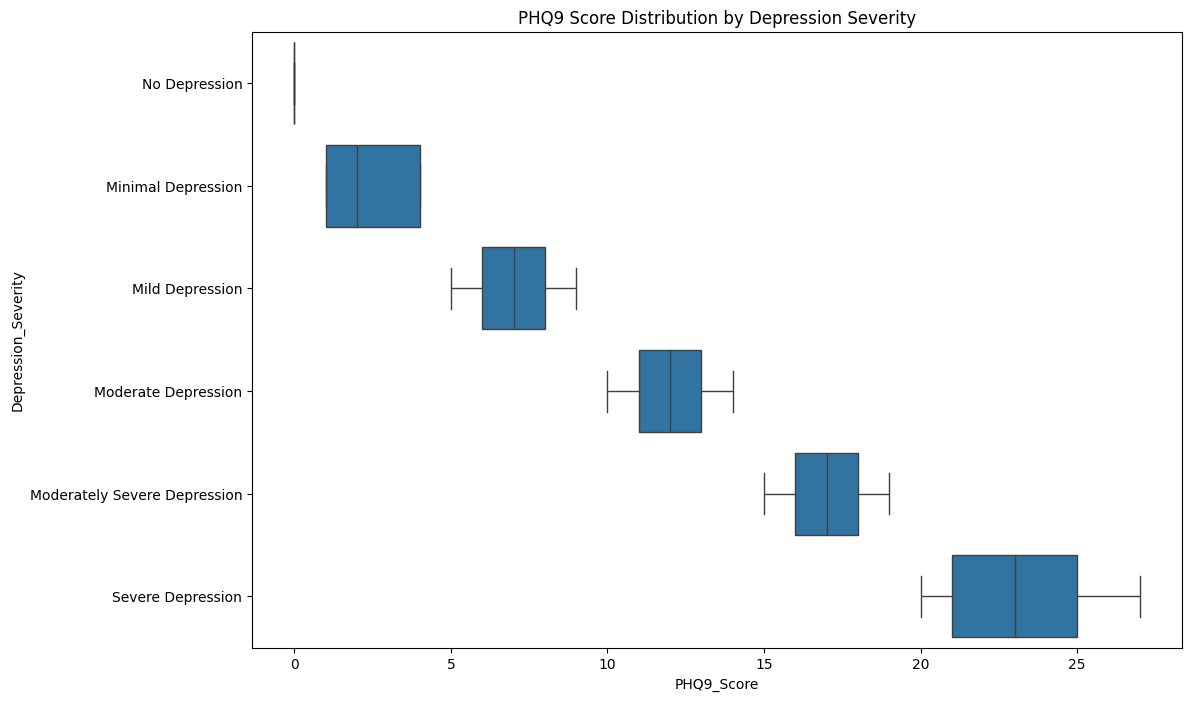

In [9]:
# Box plot of PHQ9_Score by Depression_Severity
plt.figure(figsize=(12, 8))
sns.boxplot(x='PHQ9_Score', y='Depression_Severity', data=df)
plt.title('PHQ9 Score Distribution by Depression Severity')
plt.show()

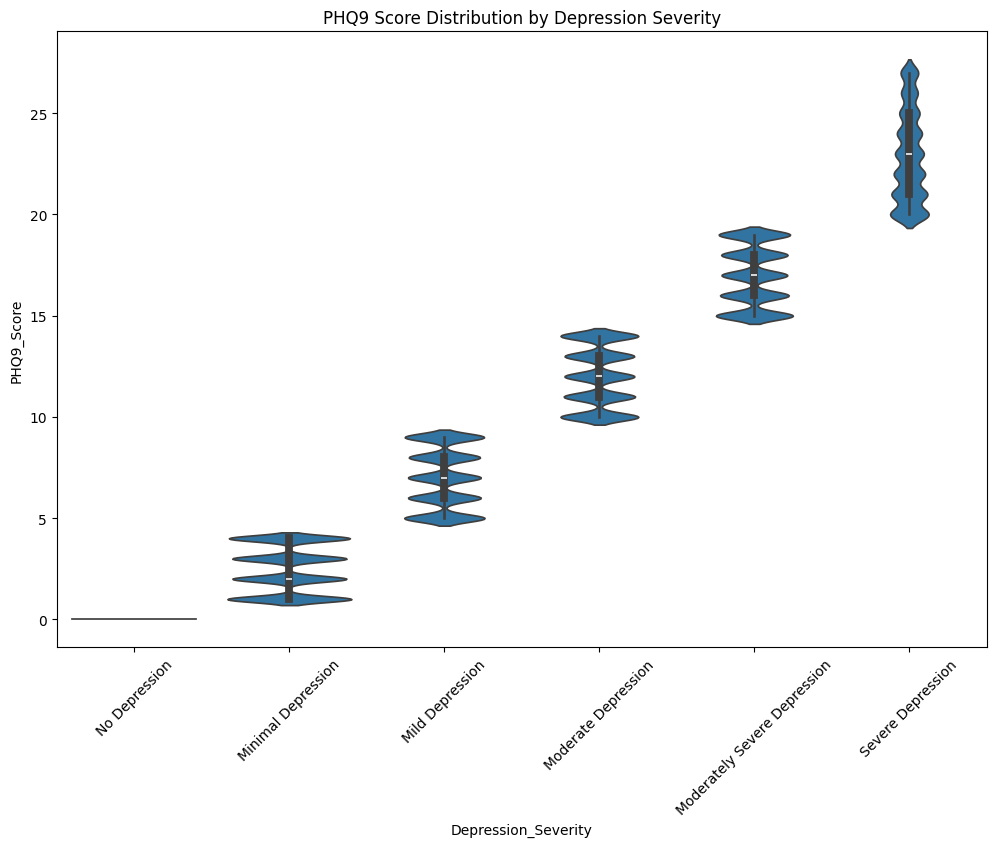

In [10]:
# Violin plot to show the distribution shape
plt.figure(figsize=(12, 8))
sns.violinplot(x='Depression_Severity', y='PHQ9_Score', data=df)
plt.title('PHQ9 Score Distribution by Depression Severity')
plt.xticks(rotation=45)
plt.show()

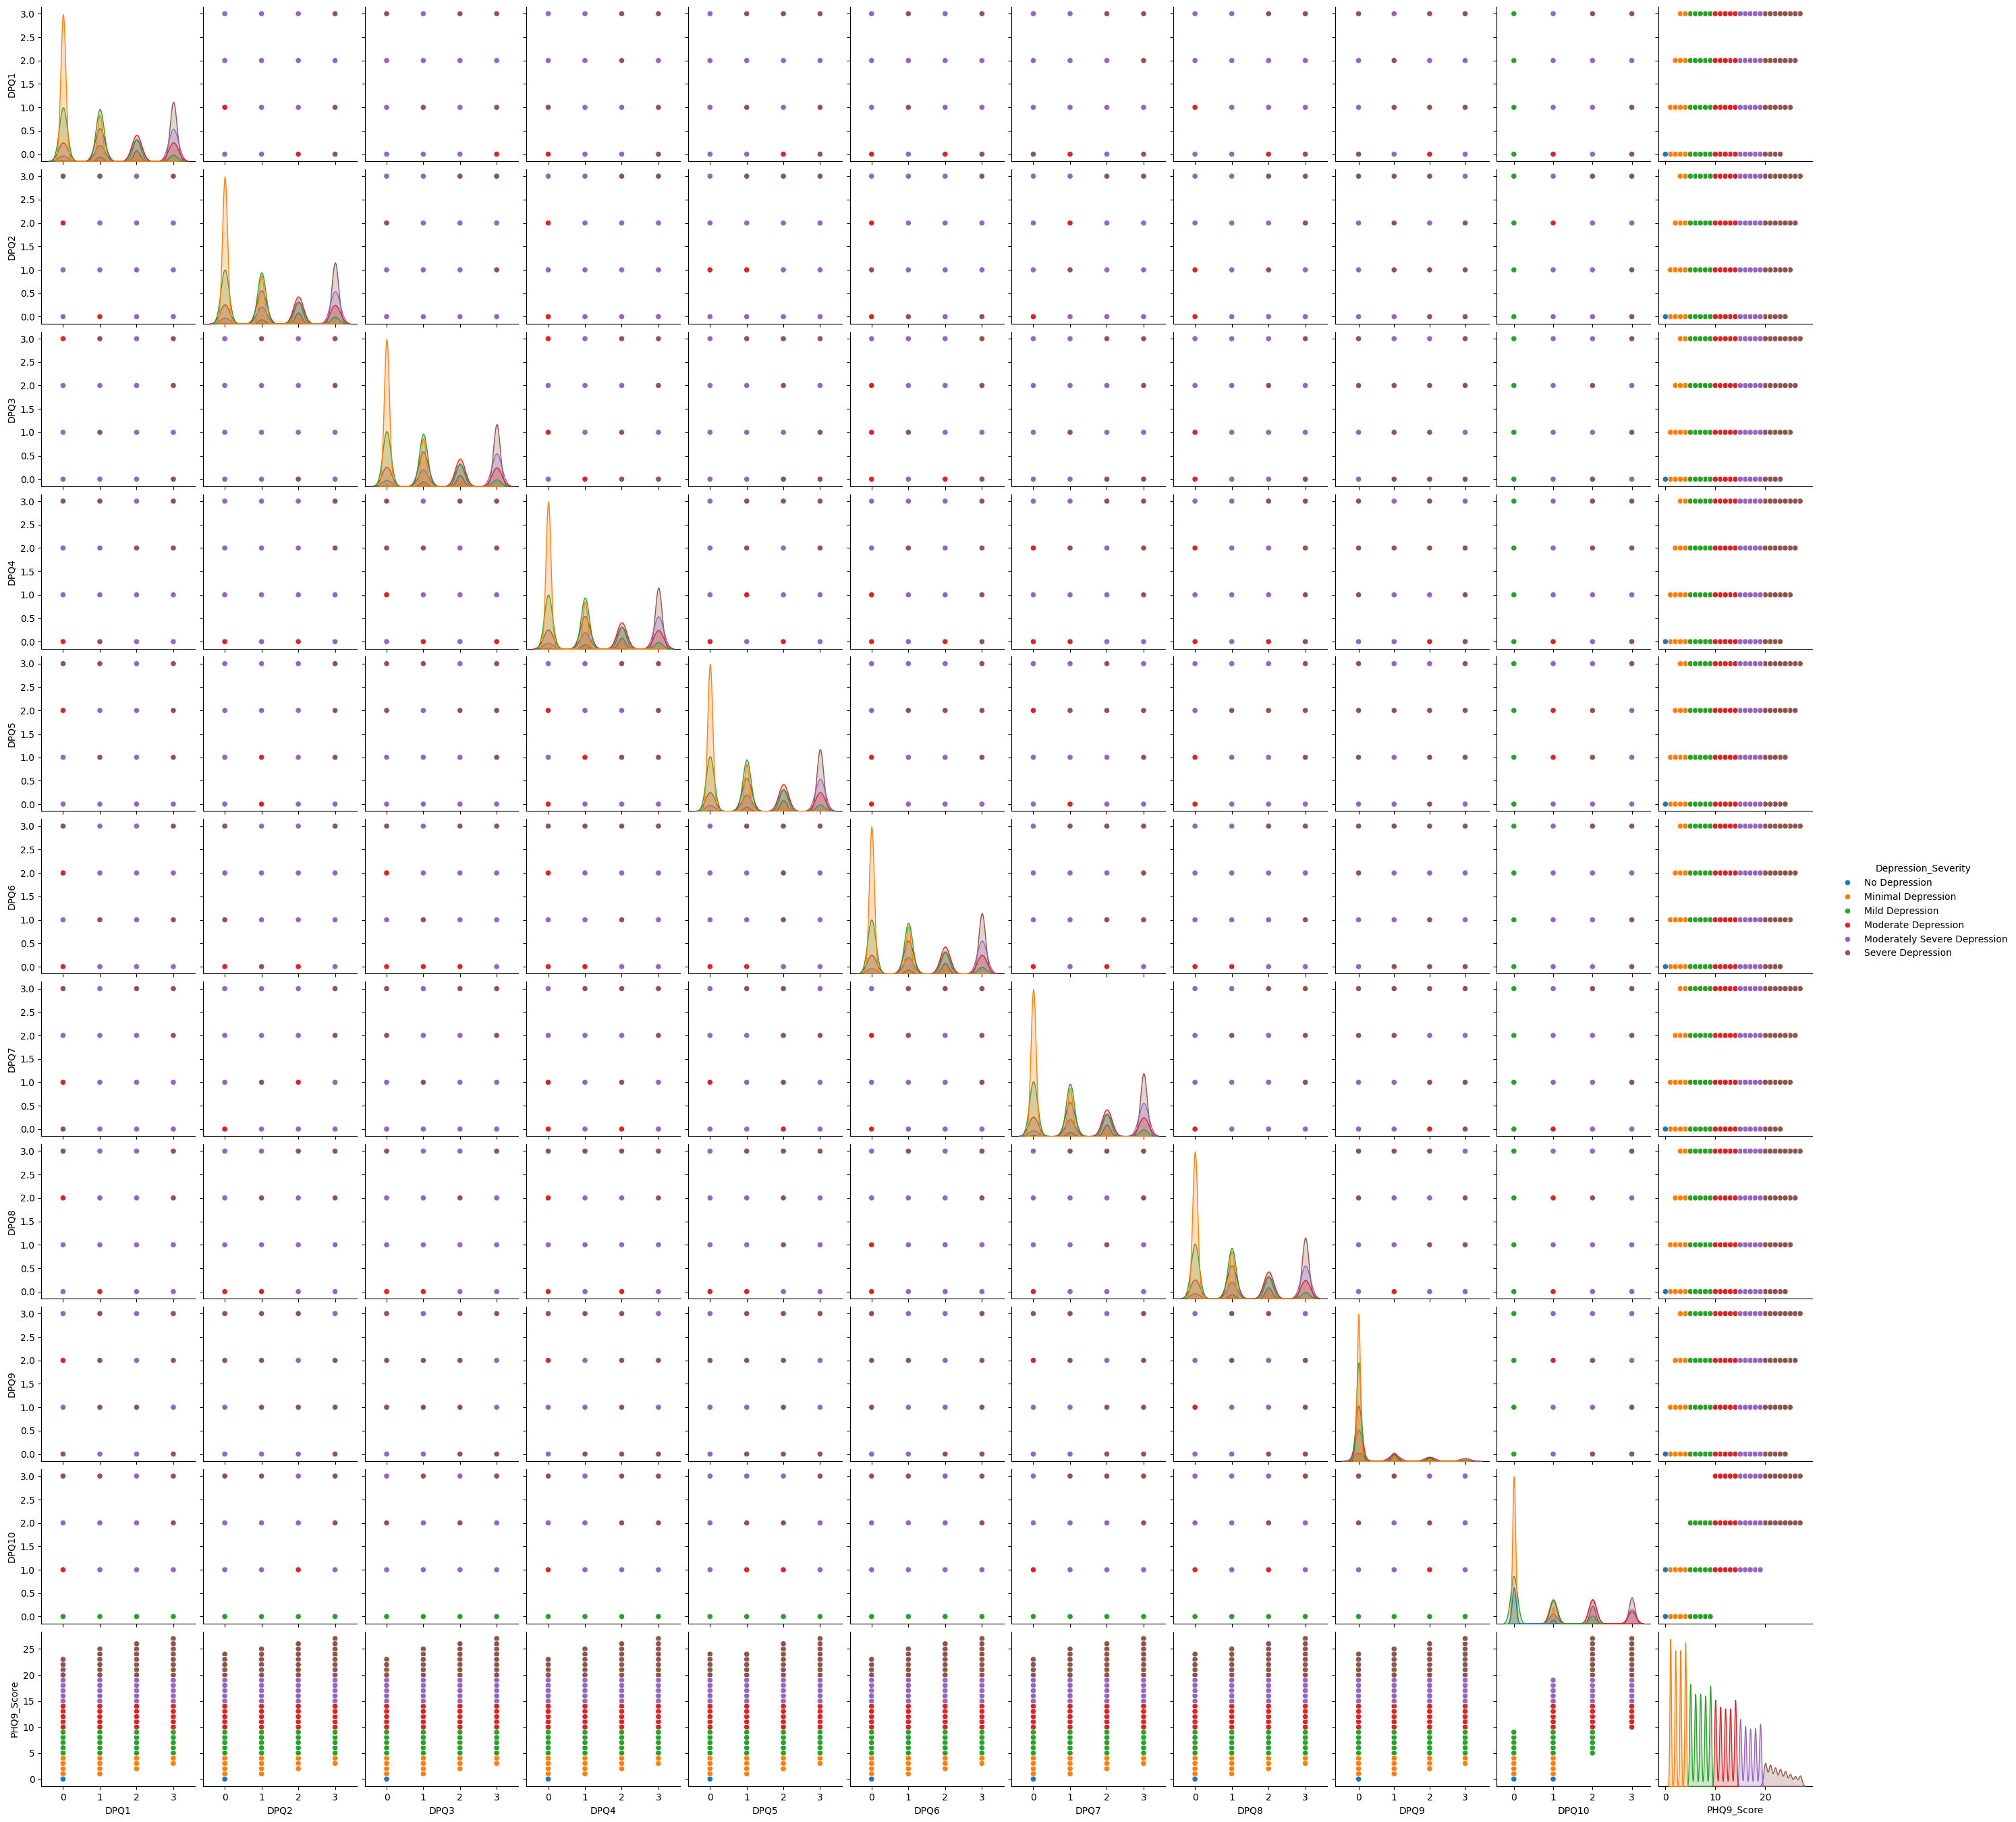

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('NHANES Depression Screening Dataset.csv')
# Pairplot to visualize relationships between a subset of features
sns.pairplot(df[['DPQ1', 'DPQ2', 'DPQ3', 'DPQ4' , 'DPQ5' , 'DPQ6', 'DPQ7', 'DPQ8', 'DPQ9','DPQ10' ,'PHQ9_Score', 'Depression_Severity']], hue='Depression_Severity')
plt.show()

## 4. Feature Engineering

While the current features are strong predictors, we could consider creating new ones to potentially improve model performance. For example:

- **Symptom Clusters**: We could group related PHQ-9 questions into symptom clusters (e.g., affective, somatic). This might help the model learn more nuanced patterns.
- **Score Variability**: For each patient, we could calculate the standard deviation of their `PHQ9_Score` over the 12 weeks to measure the volatility of their symptoms.

In [ ]:
# Example of creating a 'somatic_symptoms' feature
# DPQ3: Trouble falling or staying asleep, or sleeping too much
# DPQ4: Feeling tired or having little energy
# DPQ5: Poor appetite or overeating
df['somatic_symptoms'] = df['DPQ3'] + df['DPQ4'] + df['DPQ5']

df.head()

,Patient_ID,Week,DPQ1,DPQ2,DPQ3,DPQ4,DPQ5,DPQ6,DPQ7,DPQ8,DPQ9,DPQ10,PHQ9_Score,Depression_Severity,Base_Risk,Final_Risk,somatic_symptoms
0,1,1,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk,0
1,1,2,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk,0
2,1,3,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk,0
3,1,4,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk,0
4,1,5,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk,0


## 5. Conclusion

Our exploratory data analysis reveals several key insights:

- The data is clean and well-structured, making it suitable for machine learning.
- There is a clear and strong relationship between the individual PHQ-9 question scores and the overall `PHQ9_Score` and `Depression_Severity`.
- Visualizations confirm that as the `PHQ9_Score` increases, the severity of depression also increases, which is consistent with the PHQ-9's design.
- Feature engineering could provide additional signals for a predictive model.

In conclusion, the NHANES Depression Screening Dataset is highly suitable for training an AI model to detect depression. The features are relevant, the target variable is well-defined, and the data is of high quality.

## Additional Exploratory Analysis (from EDA‑SA notebook)

# Statistical Dossier for NHANES Depression Screening Dataset

This notebook provides an in-depth statistical analysis of the NHANES Depression Screening Dataset. We will conduct descriptive, inferential, and causal analysis to validate the feasibility of using this dataset for training an AI model to detect depression.

## 1. Setup

First, let's set up our environment by installing and importing the necessary libraries. We'll use a virtual environment to ensure compatibility.

In [1]:
# It's recommended to run this in a virtual environment.
# To create and activate a virtual environment:
# python -m venv venv
# source venv/bin/activate  # On Windows, use `venv\\Scripts\\activate`

!pip install pandas numpy matplotlib seaborn scipy statsmodels

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('NHANES Depression Screening Dataset.csv')

# Display the first few rows of the dataframe
df.head()

,Patient_ID,Week,DPQ1,DPQ2,DPQ3,DPQ4,DPQ5,DPQ6,DPQ7,DPQ8,DPQ9,DPQ10,PHQ9_Score,Depression_Severity,Base_Risk,Final_Risk
0,1,1,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk
1,1,2,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk
2,1,3,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk
3,1,4,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk
4,1,5,0,0,0,0,0,0,0,0,0,0,0,No Depression,No Risk,No Risk


## 2. Descriptive Analysis

In this section, we will explore the basic characteristics of the dataset.

In [3]:
# Get summary statistics for numerical columns
df.describe()

,Patient_ID,Week,DPQ1,DPQ2,DPQ3,DPQ4,DPQ5,DPQ6,DPQ7,DPQ8,DPQ9,DPQ10,PHQ9_Score
count,120000.00000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,5000.50000,6.500000,1.201533,1.202825,1.200383,1.200875,1.201025,1.204175,1.202508,1.200850,0.303408,1.141883,9.917583
std,2886.76336,3.452067,1.152098,1.152171,1.150242,1.153546,1.153455,1.153761,1.151988,1.152043,0.697607,1.111109,7.086612
min,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,5000.50000,6.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,9.000000
75%,7500.25000,9.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,15.000000
max,10000.00000,12.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,27.000000


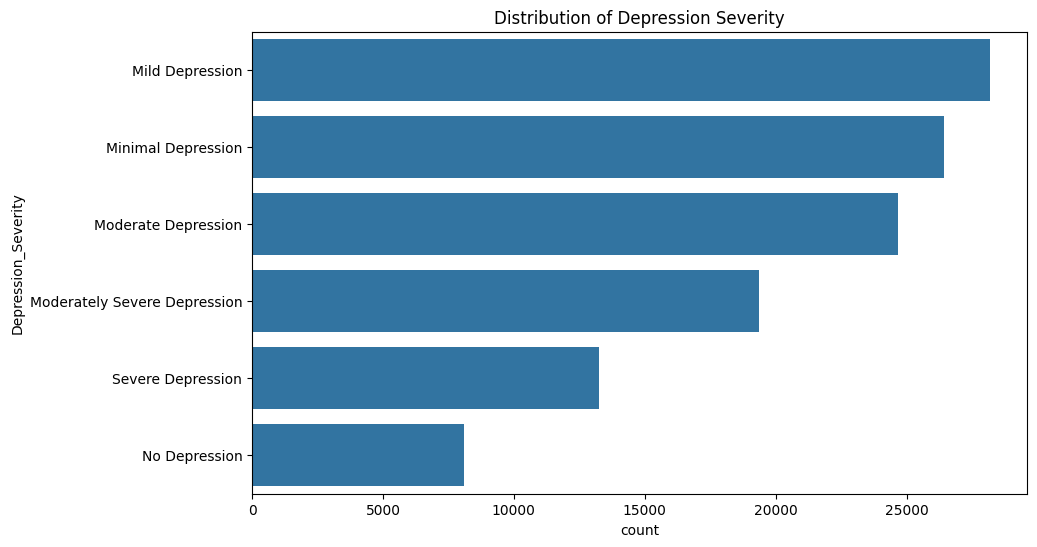

In [4]:
# Get the distribution of Depression Severity
plt.figure(figsize=(10, 6))
sns.countplot(y='Depression_Severity', data=df, order = df['Depression_Severity'].value_counts().index)
plt.title('Distribution of Depression Severity')
plt.show()

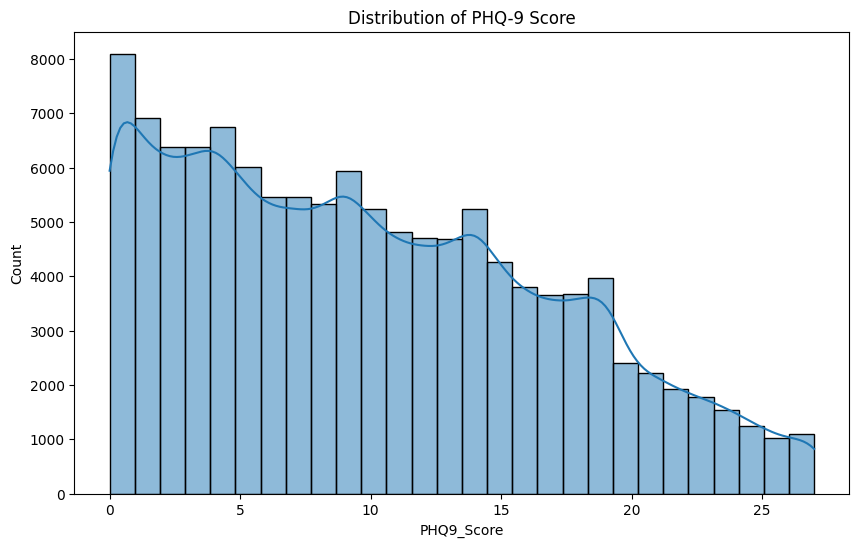

In [5]:
# Distribution of PHQ-9 Score
plt.figure(figsize=(10, 6))
sns.histplot(df['PHQ9_Score'], kde=True, bins=28)
plt.title('Distribution of PHQ-9 Score')
plt.show()

## 3. Inferential Analysis

Here, we will perform statistical tests to make inferences about the population from our sample data.

### T-test

Let's compare the `PHQ9_Score` between patients with 'No Risk' and 'Minimal Risk' in their `Base_Risk`.

In [6]:
no_risk_score = df[df['Base_Risk'] == 'No Risk']['PHQ9_Score']
minimal_risk_score = df[df['Base_Risk'] == 'Minimal Risk']['PHQ9_Score']

ttest, p_value = ttest_ind(no_risk_score, minimal_risk_score)
print(f'T-test statistic: {ttest}, P-value: {p_value}')

if p_value < 0.05:
    print('The difference in PHQ9_Score between No Risk and Minimal Risk groups is statistically significant.')
else:
    print('The difference in PHQ9_Score between No Risk and Minimal Risk groups is not statistically significant.')

T-test statistic: -197.75799319532183, P-value: 0.0
The difference in PHQ9_Score between No Risk and Minimal Risk groups is statistically significant.


### ANOVA

Now, we'll use ANOVA to compare the `PHQ9_Score` across all `Depression_Severity` categories.

In [7]:
severity_groups = df['Depression_Severity'].unique()
grouped_scores = [df[df['Depression_Severity'] == group]['PHQ9_Score'] for group in severity_groups]

f_stat, p_value = f_oneway(*grouped_scores)
print(f'ANOVA F-statistic: {f_stat}, P-value: {p_value}')

if p_value < 0.05:
    print('There is a statistically significant difference in PHQ9_Score across different depression severity levels.')
else:
    print('There is no statistically significant difference in PHQ9_Score across different depression severity levels.')

ANOVA F-statistic: 555234.148025188, P-value: 0.0
There is a statistically significant difference in PHQ9_Score across different depression severity levels.


### Chi-squared Test

Let's test the association between `Base_Risk` and `Final_Risk`.

In [8]:
contingency_table = pd.crosstab(df['Base_Risk'], df['Final_Risk'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-squared statistic: {chi2}, P-value: {p}')

if p < 0.05:
    print('There is a statistically significant association between Base_Risk and Final_Risk.')
else:
    print('There is no statistically significant association between Base_Risk and Final_Risk.')

Chi-squared statistic: 528949.6980969285, P-value: 0.0
There is a statistically significant association between Base_Risk and Final_Risk.


## 4. Causal Analysis

We'll explore the relationships between variables to understand potential causal links.

### Correlation Matrix

A correlation matrix will show us the linear relationships between the different PHQ-9 questions and the total score.

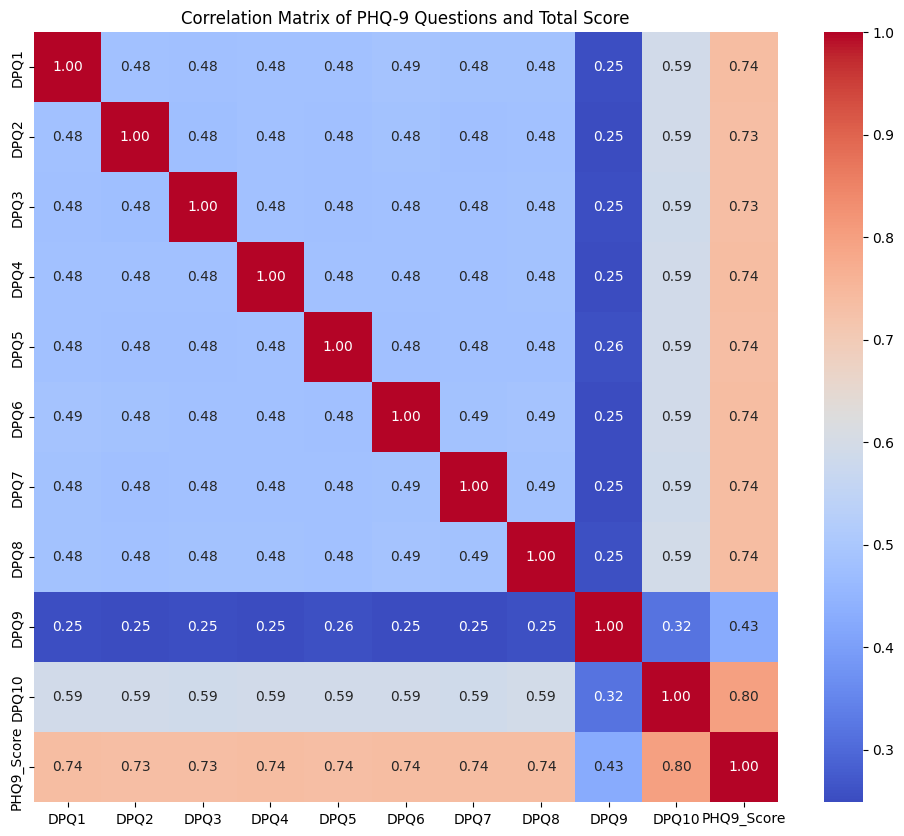

In [9]:
dpq_cols = [f'DPQ{i}' for i in range(1, 11)]
correlation_matrix = df[dpq_cols + ['PHQ9_Score']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of PHQ-9 Questions and Total Score')
plt.show()

### Regression Analysis

We'll perform a linear regression to see how each PHQ-9 question contributes to the `PHQ9_Score`.

In [10]:
X = df[dpq_cols]
y = df['PHQ9_Score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             PHQ9_Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.180e+30
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        11:00:02   Log-Likelihood:             3.2617e+06
No. Observations:              120000   AIC:                        -6.523e+06
Df Residuals:                  119989   BIC:                        -6.523e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.155e-13    1.9e-15    165.748      0.0

## 5. Conclusion

Based on our analysis:

- The dataset contains a good distribution of depression severity levels, although it is skewed towards 'No Depression'.
- Inferential tests confirm that the `PHQ9_Score` is a good indicator of depression severity and that there are significant associations between risk levels.
- The correlation and regression analyses show that all PHQ-9 questions are positively correlated with the total score, indicating they all contribute to the measurement of depression.

The dataset appears to be feasible for training an AI model to detect depression. The strong statistical relationships and the clear link between the features (PHQ-9 questions) and the target (Depression Severity) provide a solid foundation for a predictive model.

# 8. Feature Engineering
Below we construct clinically meaningful features and save the processed dataset for model training.
- **Depression_Severity**: categorical band derived from PHQ‑9 total score
- **Base_Risk**: risk category from PHQ‑9 score × suicidal‑ideation item (DPQ9)
- **Final_Risk**: escalated risk if self‑harm likelihood (DPQ10) ≥ *2*

In [ ]:

import pandas as pd

# -------- Load raw data --------
raw_path = "../data/raw/Raw -NHANES Depression Screening Dataset.csv"
df = pd.read_csv(raw_path)
df.columns = df.columns.str.strip()

# Identify and rename the PHQ‑9 score column (handles odd spacing in header)
phq_cols = [c for c in df.columns if 'phq' in c.lower() and 'score' in c.lower()]
if phq_cols:
    df = df.rename(columns={phq_cols[0]: 'PHQ9_Score'})

# -------- Helper mappings --------
def phq9_severity(score):
    if score == 0:
        return "No Depression"
    elif score <= 4:
        return "Minimal Depression"
    elif score <= 9:
        return "Mild Depression"
    elif score <= 14:
        return "Moderate Depression"
    elif score <= 19:
        return "Moderately Severe Depression"
    else:
        return "Severe Depression"          # 20‑27

def base_risk(row):
    ideation = row['DPQ9']
    score = row['PHQ9_Score']
    if ideation == 0:
        if score == 0:
            return "No Risk"
        elif score <= 4:
            return "Minimal Risk"
        elif score <= 9:
            return "Mild Risk"
        elif score <= 14:
            return "Moderate Risk"
        elif score <= 19:
            return "Moderately Severe Risk"
        else:
            return "Severe Risk"
    elif ideation == 1:
        if score <= 4:
            return "Mild Risk"
        elif score <= 9:
            return "Moderate Risk"
        elif score <= 14:
            return "Moderately Severe Risk"
        elif score <= 19:
            return "Severe Risk"
        else:
            return "High Risk"
    elif ideation == 2:
        if score <= 9:
            return "Moderate Risk"
        elif score <= 14:
            return "Moderately Severe Risk"
        elif score <= 19:
            return "Severe Risk"
        else:
            return "High Risk"
    else:       # ideation == 3
        return "High Risk"

RISK_LEVELS = ["No Risk", "Minimal Risk", "Mild Risk", "Moderate Risk",
               "Moderately Severe Risk", "Severe Risk", "High Risk"]
risk_rank = {r: i for i, r in enumerate(RISK_LEVELS)}

def escalate_risk(base, escalate_flag):
    if not escalate_flag:
        return base
    idx = min(risk_rank[base] + 1, len(RISK_LEVELS) - 1)
    return RISK_LEVELS[idx]

# -------- Feature creation --------
df['Depression_Severity'] = df['PHQ9_Score'].apply(phq9_severity)
df['Base_Risk'] = df.apply(base_risk, axis=1)
df['Final_Risk'] = df.apply(lambda r: escalate_risk(r['Base_Risk'], r['DPQ10'] >= 2), axis=1)

# -------- Save processed dataset --------
output_path = "../data/processed/Model Training - NHANES Depression Screening Dataset.csv"
df.to_csv(output_path, index=False)
print("✅ Saved engineered dataset to:", output_path)

df.head()
